In [15]:
import tensorflow as tf

tf.__version__

'2.2.0'

In [16]:
import tensorflow_datasets as tfds

tfds.__version__

'1.2.0'

In [52]:
import matplotlib.pyplot as plt
import numpy as np

# Exercise 9

## Task 1

### b)

In [17]:
mnist = tfds.load('mnist')

mnist

/home/bruno/miniconda3/envs/AIDAE/lib/python3.8/site-packages/urllib3/connectionpool.py:979: InsecureRequestWarning: Unverified HTTPS request is being made to host 'storage.googleapis.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/home/bruno/miniconda3/envs/AIDAE/lib/python3.8/site-packages/urllib3/connectionpool.py:979: InsecureRequestWarning: Unverified HTTPS request is being made to host 'storage.googleapis.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/home/bruno/miniconda3/envs/AIDAE/lib/python3.8/site-packages/urllib3/connectionpool.py:979: InsecureRequestWarning: Unverified HTTPS request is being made to host 'storage.googleapis.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings


Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Dataset mnist downloaded and prepared to /home/bruno/tensorflow_datasets/mnist/1.0.0. Subsequent calls will reuse this data.


{'test': <_OptionsDataset shapes: {image: (28, 28, 1), label: ()}, types: {image: tf.uint8, label: tf.int64}>,
 'train': <_OptionsDataset shapes: {image: (28, 28, 1), label: ()}, types: {image: tf.uint8, label: tf.int64}>}

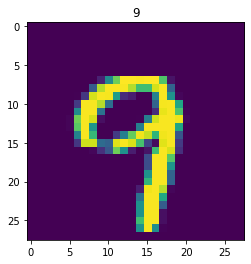

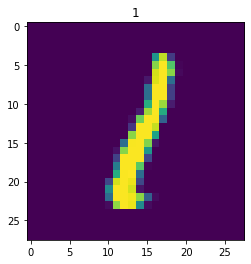

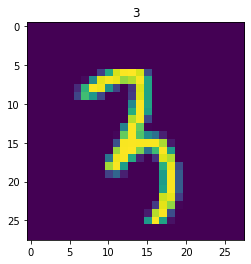

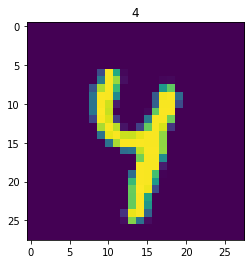

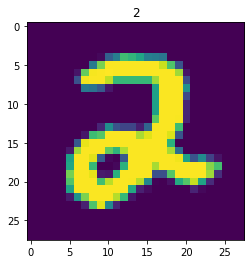

In [90]:
for mnist_sample in mnist['train'].take(5):
    plt.imshow(np.squeeze(mnist_sample['image'].numpy()))
    plt.title(mnist_sample['label'].numpy())
    plt.show()

### c)

In [68]:
for mnist_sample in mnist['train']:
    break
    
mnist_sample

{'image': <tf.Tensor: shape=(28, 28, 1), dtype=uint8, numpy=
 array([[[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
     

In [152]:
for features in mnist['train'].shuffle(10000).batch(10000).take(1):
    X_train, y_train = features['image'], features['label']

X_train.shape

TensorShape([10000, 28, 28, 1])

In [153]:
X_train[0].shape

TensorShape([28, 28, 1])

In [154]:
for features in mnist['test'].shuffle(1000).batch(1000).take(1):
    X_test, y_test = features['image'], features['label']

X_test.shape

TensorShape([1000, 28, 28, 1])

Epoch 1/5
313/313 [==============================] - 2s 8ms/step - loss: 20.1090 - accuracy: 0.7331 - val_loss: 10.6258 - val_accuracy: 0.8310
Epoch 2/5
313/313 [==============================] - 3s 8ms/step - loss: 7.8541 - accuracy: 0.8537 - val_loss: 9.0148 - val_accuracy: 0.8540
Epoch 3/5
313/313 [==============================] - 2s 5ms/step - loss: 5.8885 - accuracy: 0.8792 - val_loss: 8.5310 - val_accuracy: 0.8450
Epoch 4/5
313/313 [==============================] - 2s 7ms/step - loss: 5.2709 - accuracy: 0.8793 - val_loss: 9.2674 - val_accuracy: 0.8440
Epoch 5/5
313/313 [==============================] - 2s 7ms/step - loss: 4.7290 - accuracy: 0.8859 - val_loss: 7.9836 - val_accuracy: 0.8610


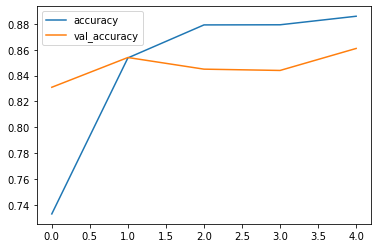

In [157]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=X_train[0].shape),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
    optimizer='adam'
)
hist = model.fit(x=X_train, y=y_train, epochs=5, validation_data=(X_test, y_test))

plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['val_accuracy'], label='val_accuracy')

plt.legend()
plt.show()

### d)

Epoch 1/20
313/313 [==============================] - 3s 8ms/step - loss: 21.0125 - accuracy: 0.7343 - val_loss: 9.7395 - val_accuracy: 0.8490
Epoch 2/20
313/313 [==============================] - 2s 8ms/step - loss: 8.0029 - accuracy: 0.8579 - val_loss: 7.8515 - val_accuracy: 0.8750
Epoch 3/20
313/313 [==============================] - 2s 8ms/step - loss: 5.8010 - accuracy: 0.8799 - val_loss: 8.0335 - val_accuracy: 0.8770
Epoch 4/20
313/313 [==============================] - 4s 12ms/step - loss: 5.1988 - accuracy: 0.8868 - val_loss: 7.6148 - val_accuracy: 0.8600
Epoch 5/20
313/313 [==============================] - 2s 5ms/step - loss: 4.7679 - accuracy: 0.8897 - val_loss: 7.9135 - val_accuracy: 0.8700
Epoch 6/20
313/313 [==============================] - 2s 7ms/step - loss: 4.3620 - accuracy: 0.8969 - val_loss: 7.9397 - val_accuracy: 0.8720
Epoch 7/20
313/313 [==============================] - 2s 7ms/step - loss: 4.2144 - accuracy: 0.8961 - val_loss: 8.9243 - val_accuracy: 0.8650
Epoc

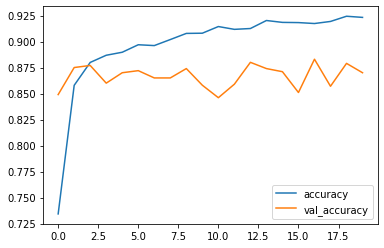

In [158]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=X_train[0].shape),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
    optimizer='adam'
)
hist = model.fit(x=X_train, y=y_train, epochs=20, validation_data=(X_test, y_test))

plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['val_accuracy'], label='val_accuracy')

plt.legend()
plt.show()

The training accuracy and the validation accuracy start to drift, a signal of overfitting.

### e)

Epoch 1/20
313/313 [==============================] - 4s 14ms/step - loss: 0.9161 - accuracy: 0.7767 - val_loss: 0.5226 - val_accuracy: 0.8750
Epoch 2/20
313/313 [==============================] - 4s 13ms/step - loss: 0.4567 - accuracy: 0.8824 - val_loss: 0.4225 - val_accuracy: 0.8880
Epoch 3/20
313/313 [==============================] - 3s 8ms/step - loss: 0.3782 - accuracy: 0.8997 - val_loss: 0.3799 - val_accuracy: 0.8980
Epoch 4/20
313/313 [==============================] - 2s 7ms/step - loss: 0.3400 - accuracy: 0.9084 - val_loss: 0.3648 - val_accuracy: 0.8990
Epoch 5/20
313/313 [==============================] - 2s 8ms/step - loss: 0.3169 - accuracy: 0.9162 - val_loss: 0.3502 - val_accuracy: 0.9050
Epoch 6/20
313/313 [==============================] - 3s 11ms/step - loss: 0.2997 - accuracy: 0.9194 - val_loss: 0.3453 - val_accuracy: 0.9050
Epoch 7/20
313/313 [==============================] - 2s 8ms/step - loss: 0.2863 - accuracy: 0.9220 - val_loss: 0.3415 - val_accuracy: 0.9060
Epo

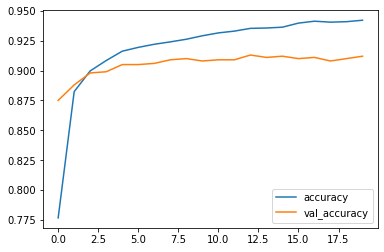

In [159]:
X_train_prep = X_train / 255
X_test_prep = X_test / 255

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=X_train[0].shape),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
    optimizer='adam'
)
hist = model.fit(x=X_train_prep, y=y_train, epochs=20, validation_data=(X_test_prep, y_test))

plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['val_accuracy'], label='val_accuracy')

plt.legend()
plt.show()

### f)

Epoch 1/20
313/313 [==============================] - 2s 8ms/step - loss: 2.0322 - accuracy: 0.4664 - val_loss: 1.8377 - val_accuracy: 0.5450
Epoch 2/20
313/313 [==============================] - 2s 8ms/step - loss: 1.6862 - accuracy: 0.5387 - val_loss: 1.5471 - val_accuracy: 0.5550
Epoch 3/20
313/313 [==============================] - 3s 8ms/step - loss: 1.4312 - accuracy: 0.5833 - val_loss: 1.3414 - val_accuracy: 0.5860
Epoch 4/20
313/313 [==============================] - 2s 6ms/step - loss: 1.2542 - accuracy: 0.6044 - val_loss: 1.2050 - val_accuracy: 0.6190
Epoch 5/20
313/313 [==============================] - 3s 9ms/step - loss: 1.1315 - accuracy: 0.6196 - val_loss: 1.1084 - val_accuracy: 0.6190
Epoch 6/20
313/313 [==============================] - 3s 9ms/step - loss: 1.0452 - accuracy: 0.6339 - val_loss: 1.0459 - val_accuracy: 0.6170
Epoch 7/20
313/313 [==============================] - 3s 8ms/step - loss: 0.9839 - accuracy: 0.6415 - val_loss: 1.0004 - val_accuracy: 0.6320
Epoch 

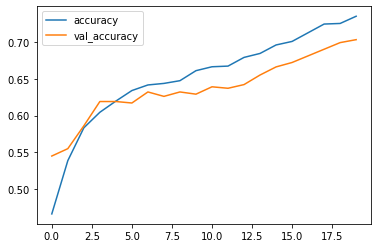

In [160]:
X_train_prep = X_train / 255
X_test_prep = X_test / 255

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=X_train[0].shape),
    tf.keras.layers.Dense(10, activation='softmax'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
    optimizer='adam'
)
hist = model.fit(x=X_train_prep, y=y_train, epochs=20, validation_data=(X_test_prep, y_test))

plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['val_accuracy'], label='val_accuracy')

plt.legend()
plt.show()

### g)

Epoch 1/20
313/313 [==============================] - 2s 8ms/step - loss: 2.0185 - accuracy: 0.3856 - val_loss: 1.8134 - val_accuracy: 0.6410
Epoch 2/20
313/313 [==============================] - 2s 6ms/step - loss: 1.6709 - accuracy: 0.5969 - val_loss: 1.4874 - val_accuracy: 0.7480
Epoch 3/20
313/313 [==============================] - 3s 9ms/step - loss: 1.4021 - accuracy: 0.6397 - val_loss: 1.2553 - val_accuracy: 0.7510
Epoch 4/20
313/313 [==============================] - 3s 9ms/step - loss: 1.2388 - accuracy: 0.6386 - val_loss: 1.0847 - val_accuracy: 0.7750
Epoch 5/20
313/313 [==============================] - 3s 10ms/step - loss: 1.1322 - accuracy: 0.6439 - val_loss: 0.9758 - val_accuracy: 0.7780
Epoch 6/20
313/313 [==============================] - 4s 12ms/step - loss: 1.0376 - accuracy: 0.6531 - val_loss: 0.8892 - val_accuracy: 0.7800
Epoch 7/20
313/313 [==============================] - 2s 8ms/step - loss: 1.0090 - accuracy: 0.6513 - val_loss: 0.8310 - val_accuracy: 0.7760
Epoc

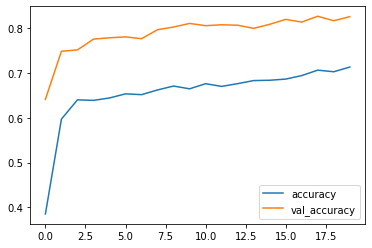

In [162]:
X_train_prep = X_train / 255
X_test_prep = X_test / 255

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=X_train[0].shape),
    tf.keras.layers.Dense(10, activation='softmax'),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
    optimizer='adam'
)
hist = model.fit(x=X_train_prep, y=y_train, epochs=20, validation_data=(X_test_prep, y_test))

plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['val_accuracy'], label='val_accuracy')

plt.legend()
plt.show()